In [49]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
data = pd.read_csv('AusOpen-women-2013.csv')

In [51]:
print(list(data.columns.values))

['Player1', 'Player2', 'Round', 'Result', 'FNL1', 'FNL2', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1', 'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2']


In [52]:
players = data[['Player1', 'Player2', 'Result']]
print(players.head())

              Player1             Player2  Result
0     Serena Williams      Ashleigh Barty       1
1        Vesna Dolonc   Lara Arruabarrena       1
2  Pauline Parmentier   Karolina Pliskova       0
3      Heather Watson  Daniela Hantuchova       0
4     Samantha Stosur    Klara Zakopalova       1


In [53]:
#cluster = KMeans(n_clusters=2)

In [54]:
serena_data = data[data['Player1'] == 'Serena Williams'].reset_index()
#print(serena_data)

Text(0.5, 1.0, 'Player 1 Wins')

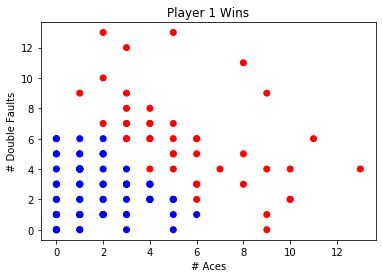

In [55]:
#let's see if aces, double faults, net points can predict winners
features = data[['ACE.1', 'DBF.1','Result']]
features = features.dropna()
x = features['ACE.1']
y = features['DBF.1']
model_features = features[['ACE.1', 'DBF.1']]

labels = features.Result

model = KMeans(n_clusters = 2)
model.fit(model_features)

prediction = model.predict(model_features)


# Iterate over each label, and 
# assign the color based on the label
colors = []
for label in prediction:
  if label == 0:
    colors.append("red")
  elif label == 1:
    colors.append("blue")
    
#plot and use labels as colors
plt.scatter(x, y, c=colors)
plt.xlabel('# Aces')
plt.ylabel('# Double Faults')
plt.title('Player 1 Wins')

Text(0.5, 1.0, 'Player 2 Wins')

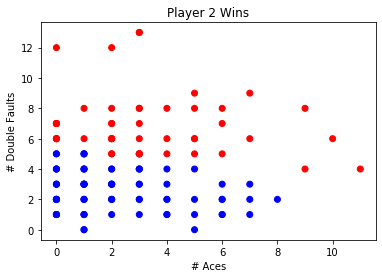

In [56]:
#let's examine player 2
#dropping NaNs
features2 = data[['ACE.2', 'DBF.2','Result']]
features2 = features2.dropna()

#separating x, y & color labels
x2 = features2['ACE.2']
y2 = features2['DBF.2']
model_features2 = features2[['ACE.2', 'DBF.2']]

labels2 = features2.Result

model2 = KMeans(n_clusters = 2)
model2.fit(model_features2)

prediction2 = model2.predict(model_features2)


# Iterate over each label, and 
# assign the color based on the label
colors2 = []
for label in prediction2:
  #0 means player two won
  if label == 0:
    colors2.append("blue")
  elif label == 1:
    colors2.append("red")
    
#plot and use labels as colors
plt.scatter(x2, y2, c=colors2)
plt.xlabel('# Aces')
plt.ylabel('# Double Faults')
plt.title('Player 2 Wins')

Text(0.5, 1.0, 'Player 1 Wins, KMeans')

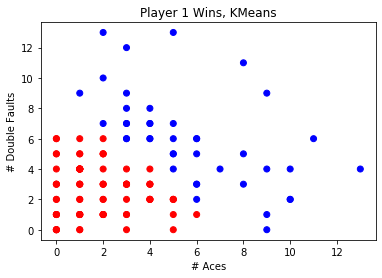

In [57]:
#Let's see how KMeans changes these results
new_model = KMeans(n_clusters = 2, init='random')

#player 1 stats
new_model.fit(model_features)

prediction_new1 = new_model.predict(model_features)


# Iterate over each label, and 
# assign the color based on the label
colors_new1 = []
for label in prediction_new1:
  if label == 0:
    colors_new1.append("red")
  elif label == 1:
    colors_new1.append("blue")
    
#plot and use labels as colors
plt.scatter(x, y, c=colors_new1)
plt.xlabel('# Aces')
plt.ylabel('# Double Faults')
plt.title('Player 1 Wins, KMeans')

Text(0.5, 1.0, 'Player 2 Wins, KMeans')

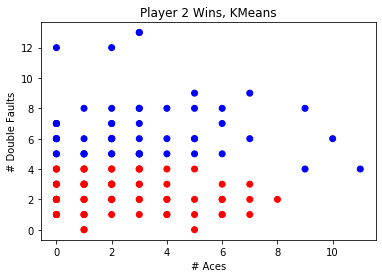

In [58]:
#Let's see how KMeans changes these results
new_model2 = KMeans(n_clusters = 2, init='random')

#player 1 stats
new_model2.fit(model_features2)

prediction_new2 = new_model2.predict(model_features2)


# Iterate over each label, and 
# assign the color based on the label
colors_new2 = []
for label in prediction_new2:
  if label == 0:
    colors_new2.append("blue")
  elif label == 1:
    colors_new2.append("red")
    
#plot and use labels as colors
plt.scatter(x2, y2, c=colors_new2)
plt.xlabel('# Aces')
plt.ylabel('# Double Faults')
plt.title('Player 2 Wins, KMeans')

In [59]:
#KMeans++ produces results we would expect 
#let's confirm this by calculatin accuracy, precision, recall, & F1
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#Player 1 KMeans++
player1_labels = features['Result']
#print(accuracy_score(player1_labels, prediction))
#print(recall_score(player1_labels, prediction))
#print(precision_score(player1_labels, prediction))
#print(f1_score(player1_labels, prediction))

#Player 1 KMeans
#print(accuracy_score(player1_labels, prediction_new1))
#print(recall_score(player1_labels, prediction_new1))
#print(precision_score(player1_labels, prediction_new1))
#print(f1_score(player1_labels, prediction_new1))

##As seen, KMeans performed considerably worse on all fronts
#Let's see about player 2

#Player 2 KMeans++
player2_labels = features2['Result']
print(accuracy_score(player2_labels, prediction2))
print(recall_score(player2_labels, prediction2))
print(precision_score(player2_labels, prediction2))
print(f1_score(player2_labels, prediction2))

#Player 2 KMeans
print(accuracy_score(player2_labels, prediction_new2))
print(recall_score(player2_labels, prediction_new2))
print(precision_score(player2_labels, prediction_new2))
print(f1_score(player2_labels, prediction_new2))

#KMeans++ performed considerably better once again

0.5537190082644629
0.45454545454545453
0.625
0.5263157894736842
0.4214876033057851
0.48484848484848486
0.47058823529411764
0.4776119402985075


In [60]:
####################
###Surpervised ML###
####################

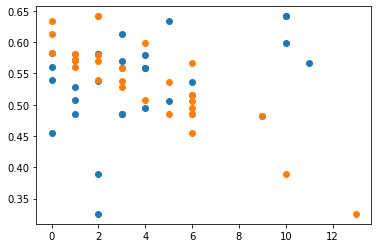

In [63]:
#let's start with multiple linear regression
mlr = LinearRegression()

#Player 1 train & test sets

train_data, test_data, train_labels, test_labels = train_test_split(model_features, labels)
mlr.fit(train_data, train_labels)
mlr_predict1 = mlr.predict(test_data)

plt.plot(test_data, mlr_predict1, 'o')
